<a href="https://colab.research.google.com/github/shannondill/GEOG5990M/blob/main/ThirdDraft_GEOG5990M_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5990M Final Assignment (3rd Draft)

Student ID number: 201896295

This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>



# Importing Packages

In [126]:
# import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy import stats
import numpy as np
# import the required machine learning packages
from sklearn import cluster
from sklearn.preprocessing import scale

# set seaborn plotting theme to white
sns.set_theme(style="white")
!pip install mapclassify

In [127]:
# import further required packages
! pip install contextily
! pip install geoplot
! pip install git+https://github.com/pmdscully/geo_northarrow.git
import geoplot as gplt
import geoplot.crs as gcrs
from geo_northarrow import add_north_arrow
import contextily as ctx

  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-g_j0zt2g
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-g_j0zt2g
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit 963bdd271707a3bcaa47b2d83d92b88ae0b10950
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Importing Data Sets

In [128]:
# Cycle Data (July 2024) [1]
cyclejuly24 = gpd.read_file('CycleData_July2024.csv')
# make column names lowercase
cyclejuly24.columns = cyclejuly24.columns.str.lower()
# check table has been updated
cyclejuly24.head()

,sdate,cosit,period,lanenumber,lanedescription,lanedirection,directiondescription,volume,flag text
0,01/07/2024,80474,60,1,Eastbound,1,East,1,Checked
1,01/07/2024,80474,60,2,Westbound,2,West,0,Checked
2,01/07/2024,80474,60,1,Eastbound,1,East,0,Checked
3,01/07/2024,80474,60,2,Westbound,2,West,1,Checked
4,01/07/2024,80474,60,1,Eastbound,1,East,0,Checked


Leeds Cycle Data source (July 2024) [[1]](https://datamillnorth.org/dataset/e1dmk/leeds-annual-cycle-growth)

In [129]:
# Leeds Cycle Sites [2]
cyclesites = gpd.read_file('ListCycleCountSites_Leeds_Sept2024.csv')
# make column names lowercase
cyclesites.columns = cyclesites.columns.str.lower()
# check table has been updated
cyclesites.head()

,site_id,site_name,description,grid,latitude,longitude
0,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.20E+11,53.8029,-1.69942
1,80475,Cycle H0475,A647 Bradford Road Cycle Superhighway (westbound),4.20E+11,53.80304,-1.6975
2,90120,Cycle I0120,Kirkstall Forge Canal Towpath Cycle Counter,4.25E+11,53.82305,-1.62262
3,90241,Cycle I0241,Cardigan Lane Cycle Counter,4.28E+11,53.81308,-1.57279
4,90319,Cycle I0319,Stanningley Road Cycle Superhighway (eastbound),4.25E+11,53.80571,-1.62874


Cycle Count Data Sites- Leeds District [[2]](https://datamillnorth.org/dataset/e1dmk/leeds-annual-cycle-growth)

In [130]:
# HAVEN'T DECIDED IF I NEED THIS OR NOT??!
# upload files
# Leeds MSOA shapefile
#msoa_leeds = gpd.read_file('LEEDS_MSOA.xlsx')
#msoa_leeds.columns = msoa_leeds.columns.str.lower()
#msoa_leeds.head()

In [131]:
# Leeds LSOA Boundary data [3]
lsoa_leeds = gpd.read_file('LSOA_LEEDS.xlsx')
#make column names lowercase
lsoa_leeds.columns = lsoa_leeds.columns.str.lower()
# check table has been updated
lsoa_leeds.head()

,fid,lsoa21cd,lsoa21nm,lsoa21nmw,bng_e,bng_n,lat,long,shape__area,shape__length,globalid
0,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,6.373247e+05,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67
1,10721,E01011265,Leeds 009A,,418988,441951,53.87343,-1.71270,5.273672e+05,7553.237963,4d252abf-180d-4c24-ae8f-3932dd433d0f
2,10722,E01011266,Leeds 008A,,417489,442615,53.87945,-1.73546,2.531467e+06,8353.989324,66191f73-111e-4f37-ba33-42666730927f
3,10723,E01011267,Leeds 009B,,419641,442025,53.87408,-1.70276,4.491912e+05,3774.393194,85e5e657-9d57-4a48-aa5f-61fdc02cd326
4,10724,E01011268,Leeds 010A,,420224,441935,53.87324,-1.69390,3.949483e+05,4362.834372,58280f14-db59-4eee-875a-44d3c04026d8


Leeds LSOA Boundary Data [[3]](https://geoportal.statistics.gov.uk/datasets/ons::lower-layer-super-output-areas-december-2021-boundaries-ew-bfc-v10-2/about)

In [132]:
# travel to work data
# Data source: University of Leeds, Geography Dept, re: F.Pontin [4]

leeds_travel = gpd.read_file('leeds_travel_to_work_mode_distance.geojson.txt')
#make column names lowercase
leeds_travel.columns = leeds_travel.columns.str.lower()
#check table has been updated
leeds_travel.head()

,fid,lsoa21cd,lsoa21nm,wd24nm,bng_e,bng_n,long,lat,total_distance_to_work,less than 10km,...,"bus, minibus or coach",taxi,"motorcycle, scooter or moped",driving a car or van,passenger in a car or van,bicycle,on foot,other method of travel to work,not in employment or aged 15 years and under,geometry
0,10720,E01011264,Leeds 011A,Otley & Yeadon,420937,441836,-1.68306,53.87232,1284,200,...,25,2,1,312,23,5,45,6,703,"POLYGON ((421248.688 442315.812, 421284.072 44..."
1,10721,E01011265,Leeds 009A,Guiseley & Rawdon,418988,441951,-1.71269,53.87343,1953,240,...,17,4,2,335,23,11,72,10,998,"POLYGON ((418635 442559, 418637.555 442552.869..."
2,10722,E01011266,Leeds 008A,Guiseley & Rawdon,417489,442615,-1.73545,53.87945,2617,356,...,13,7,0,603,24,9,60,7,1174,"POLYGON ((417783.688 443382.312, 417788.688 44..."
3,10723,E01011267,Leeds 009B,Guiseley & Rawdon,419641,442025,-1.70276,53.87407,1701,269,...,15,8,3,373,21,8,87,3,937,"POLYGON ((419607.843 442388.568, 419612.752 44..."
4,10724,E01011268,Leeds 010A,Otley & Yeadon,420224,441935,-1.69390,53.87324,1401,278,...,35,8,1,316,36,10,99,2,757,"POLYGON ((420442.406 442436.687, 420443.313 44..."


Leeds Travel to Work data [[4]](https://raw.githubusercontent.com/FrancescaPontin/GEOG5990M/refs/heads/main/data/week_6_7/leeds_travel_to_work_mode_distance.geojson)

This file will make use of the geometry coloumn for each LSOA

# Data Cleaning

NEED JUSTIFICATION OF DATA CLEANING

Table Join:
Left join of 'cyclejuly24' and 'cyclesites', using the 'cosit' and 'site_id' coloumns to complete the merge.

In [133]:
# table join LEFT
# cyclejuly24 --> cyclesites
# cosit --> siteid
cycleleeds24 = pd.merge(cyclejuly24, cyclesites, left_on='cosit', right_on='site_id',
                        how='left')
# check table has been updated
cycleleeds24.head()

,sdate,cosit,period,lanenumber,lanedescription,lanedirection,directiondescription,volume,flag text,site_id,site_name,description,grid,latitude,longitude
0,01/07/2024,80474,60,1,Eastbound,1,East,1,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.20E+11,53.8029,-1.69942
1,01/07/2024,80474,60,2,Westbound,2,West,0,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.20E+11,53.8029,-1.69942
2,01/07/2024,80474,60,1,Eastbound,1,East,0,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.20E+11,53.8029,-1.69942
3,01/07/2024,80474,60,2,Westbound,2,West,1,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.20E+11,53.8029,-1.69942
4,01/07/2024,80474,60,1,Eastbound,1,East,0,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.20E+11,53.8029,-1.69942


Table Join: Mergeing only the 'geometry' coloumn from 'leeds_travel' so that it can be spatially visualized on a map.

In [134]:
# add geometry to lsoa_leeds
### CO-PILOT ###
# The following prompt was used in Co-pilot to isolate and join the geometry column with the LSOA data:
# "python, pandas: how to merge a table with only one column from another table?"
# The response generated was used to help write the below code

leeds_geo = lsoa_leeds.merge(leeds_travel[['fid', 'geometry']], on='fid')
# Ensure it is saved as a GeoDataFrame (to make use of the geometry)
leeds_geo = gpd.GeoDataFrame(leeds_geo)
leeds_geo.head()

,fid,lsoa21cd,lsoa21nm,lsoa21nmw,bng_e,bng_n,lat,long,shape__area,shape__length,globalid,geometry
0,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,6.373247e+05,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,"POLYGON ((421248.688 442315.812, 421284.072 44..."
1,10721,E01011265,Leeds 009A,,418988,441951,53.87343,-1.71270,5.273672e+05,7553.237963,4d252abf-180d-4c24-ae8f-3932dd433d0f,"POLYGON ((418635 442559, 418637.555 442552.869..."
2,10722,E01011266,Leeds 008A,,417489,442615,53.87945,-1.73546,2.531467e+06,8353.989324,66191f73-111e-4f37-ba33-42666730927f,"POLYGON ((417783.688 443382.312, 417788.688 44..."
3,10723,E01011267,Leeds 009B,,419641,442025,53.87408,-1.70276,4.491912e+05,3774.393194,85e5e657-9d57-4a48-aa5f-61fdc02cd326,"POLYGON ((419607.843 442388.568, 419612.752 44..."
4,10724,E01011268,Leeds 010A,,420224,441935,53.87324,-1.69390,3.949483e+05,4362.834372,58280f14-db59-4eee-875a-44d3c04026d8,"POLYGON ((420442.406 442436.687, 420443.313 44..."


Check if the data set has any missing variables

In [135]:
# determine if there is any missing variables
leeds_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   fid            488 non-null    int32   
 1   lsoa21cd       488 non-null    object  
 2   lsoa21nm       488 non-null    object  
 3   lsoa21nmw      438 non-null    object  
 4   bng_e          488 non-null    int32   
 5   bng_n          488 non-null    int32   
 6   lat            488 non-null    float64 
 7   long           488 non-null    float64 
 8   shape__area    488 non-null    float64 
 9   shape__length  488 non-null    float64 
 10  globalid       488 non-null    object  
 11  geometry       488 non-null    geometry
dtypes: float64(4), geometry(1), int32(3), object(4)
memory usage: 40.2+ KB


In [136]:
# preliminary analysis of data variables
leeds_geo.describe()

,fid,bng_e,bng_n,lat,long,shape__area,shape__length
count,488.000000,488.000000,488.000000,488.000000,488.000000,4.880000e+02,488.000000
mean,13058.920082,429745.625000,434948.334016,53.809963,-1.549772,1.130584e+06,5786.614696
std,6290.620828,5765.760679,4842.130100,0.043537,0.087553,2.474508e+06,4101.902051
min,10720.000000,415777.000000,424017.000000,53.711790,-1.761520,6.841824e+04,1468.561952
25%,10841.750000,425662.500000,432060.750000,53.784153,-1.611582,2.867231e+05,3602.155632
50%,10963.500000,429497.000000,434871.000000,53.809385,-1.553590,4.167918e+05,4608.975310
75%,11085.250000,433151.750000,437635.000000,53.834163,-1.498177,8.121349e+05,6270.330050
max,33049.000000,444141.000000,449492.000000,53.940050,-1.330510,2.551487e+07,30781.985060


Ensure all LSOAs in Leeds are accounted for - visual analysis is used to help pinpoint any missing areas (blank spaces on the map), instead of reading through the large dataset row by row.

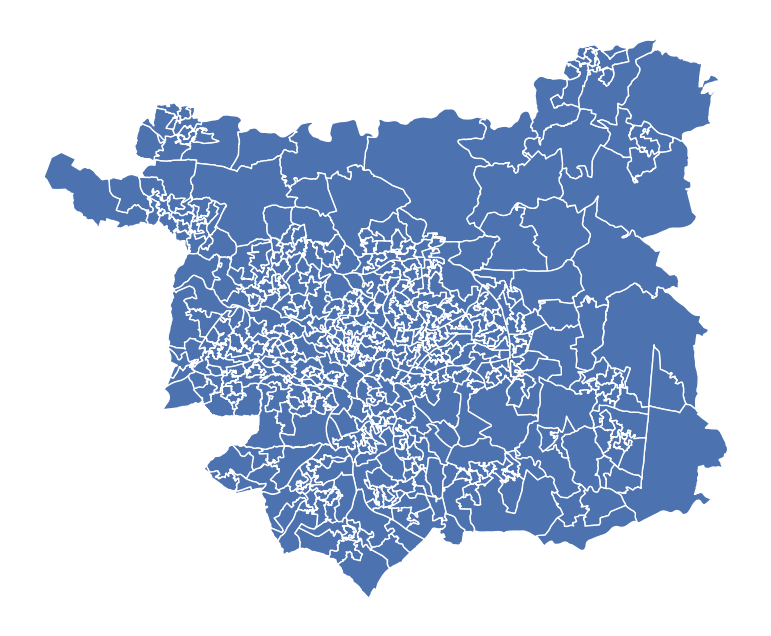

In [137]:
# Plot leeds_geo

# define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# plot leeds_geo data specifying subplot axis
leeds_geo.plot(ax=ax)
# make axis invisible
ax.set_axis_off()
plt.show()

All LSOAs are plotted on the map.

### Updating data types:

In [138]:
# Check what the data types are classed under
cycleleeds24.dtypes

,0
sdate,object
cosit,object
period,object
lanenumber,object
lanedescription,object
lanedirection,object
directiondescription,object
volume,object
flag text,object
site_id,object


Update data types.

In [139]:
# update the data types from 'objects' to its numeric form (eg/. 'float', 'int', 'string')
cycleleeds24['cosit']=pd.to_numeric(cycleleeds24['cosit'])

cycleleeds24['lanedescription']=cycleleeds24['lanedescription'].astype('str')
cycleleeds24['directiondescription']=cycleleeds24['directiondescription'].astype('str')

cycleleeds24['site_id']=pd.to_numeric(cycleleeds24['site_id'])
cycleleeds24['site_name']=cycleleeds24['site_name'].astype('str')

cycleleeds24['latitude']=pd.to_numeric(cycleleeds24['latitude'])
cycleleeds24['longitude']=pd.to_numeric(cycleleeds24['longitude'])


# check it has been updated
cycleleeds24.dtypes

#SOURCE: https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int
  # df['col_name'] = pd.to_numeric(df['col_name'])
#SOURCE: https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe
  # df['column'] = df['column'].astype('str')

,0
sdate,object
cosit,int64
period,object
lanenumber,object
lanedescription,object
lanedirection,object
directiondescription,object
volume,object
flag text,object
site_id,int64


SOURCES: https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int

  df['col_name'] = pd.to_numeric(df['col_name'])

SOURCE: https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe

df['column'] = df['column'].astype('str')

Change the 'sdate' coloumn dtype to datetime.

In [140]:
### CO-PILOT ###
# The following prompt was used in Co-pilot to isolate and join the geometry column with the LSOA data:
# "python, pandas: generate a code using pd.to_datetime(df['col']) to ensure the
  # date is read day-month-year"
# The response generated was used to help write the below code

# change sdate from 'object' to 'date' dtype
cycleleeds24['sdate']=pd.to_datetime(cycleleeds24['sdate'],
                                     # make sure it is reading as day/month/year
                                     dayfirst=True)

# Check changes were made
cycleleeds24.dtypes

,0
sdate,datetime64[ns]
cosit,int64
period,object
lanenumber,object
lanedescription,object
lanedirection,object
directiondescription,object
volume,object
flag text,object
site_id,int64


### Statistical Modelling

<Figure size 1600x800 with 0 Axes>

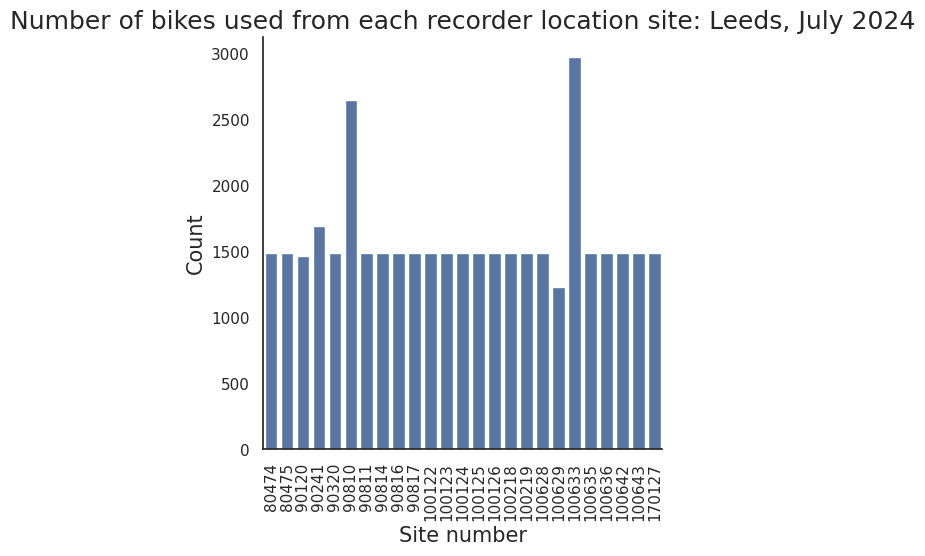

In [141]:
# Bar chart: bike at its recorded location for July 2024
plt.figure(figsize=(16,8))

sns.catplot(x='cosit', data=cycleleeds24, kind='count', width=0.8)

# set title and font size
plt.title('Number of bikes used from each recorder location site: Leeds, July 2024', size=18)

# set axis titles and font size
plt.xlabel('Site number',size=15)
plt.ylabel('Count', size=15)

# rotate x-axis labels (SOURCE!!!)
plt.xticks(rotation=90)
plt.show()

# SOURCE: https://www.geeksforgeeks.org/rotate-axis-tick-labels-in-seaborn-and-matplotlib/
  # plt.xticks(rotation=45)

x-axis labels rotated 90degrees so the information is readable.

<ipython-input-142-e5ae689bc560>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='directiondescription', data=cycleleeds24, kind='count', width=0.8,


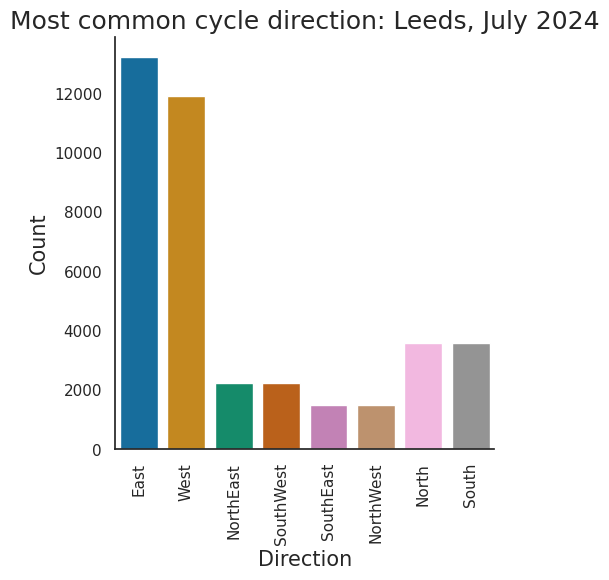

In [142]:
sns.catplot(x='directiondescription', data=cycleleeds24, kind='count', width=0.8,
            #set colour
            palette='colorblind')

#set title and font size
plt.title('Most common cycle direction: Leeds, July 2024', size=18)

#set axis titles and font size
plt.xlabel('Direction', size=15)
plt.ylabel('Count', size=15)

#rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

In [143]:
#f,ax = plt.subplots(1,2)

#sns.catplot( x='site_id', y='cosit', hue='directiondescription', data=cycleleeds24, ax=ax[0])
#sns.catplot(x='site_id', y='cosit', hue='directiondescription', data=cycleleeds24, ax=ax[1])
#plt.show()

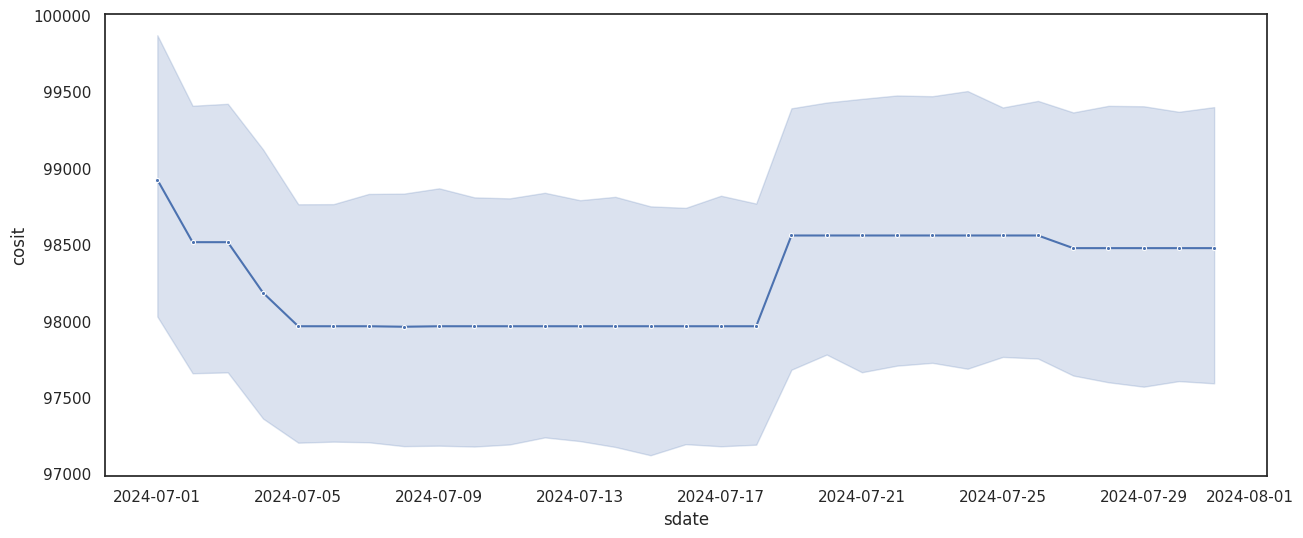

In [144]:
# change figure size
plt.figure(figsize=(15,6))


sns.lineplot(x='sdate', y='cosit', data=cycleleeds24, marker='.');

<Axes: >

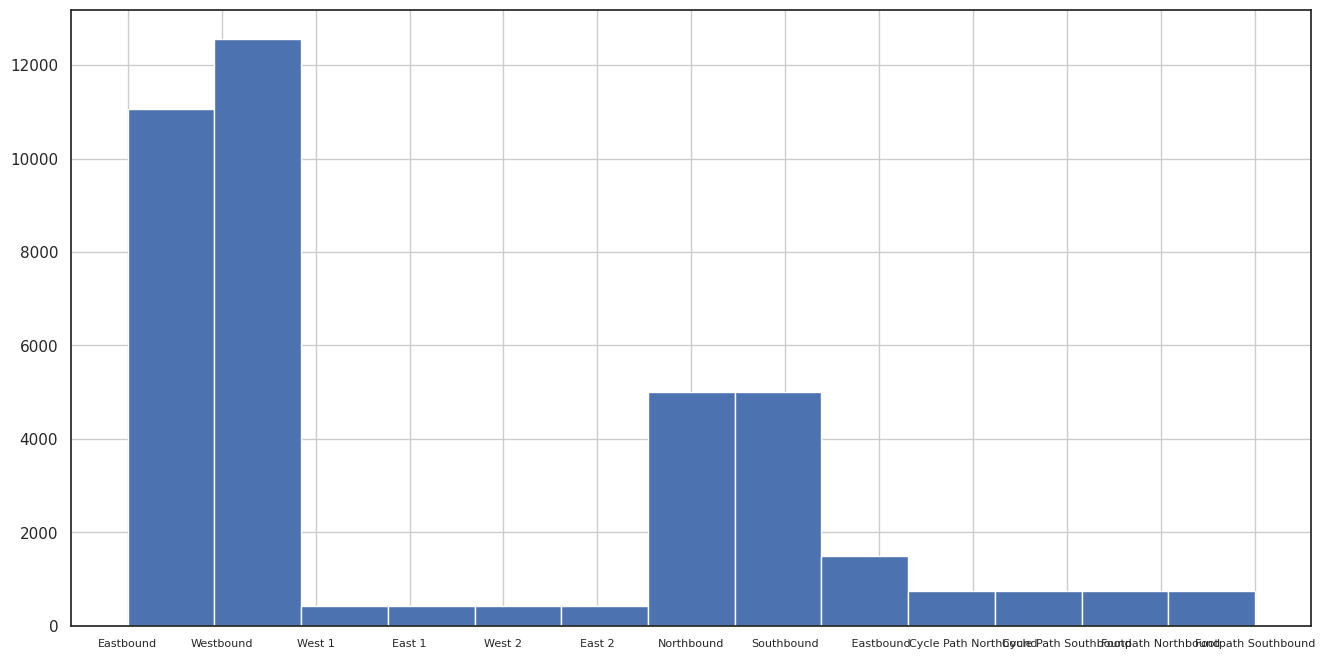

In [ ]:
# titanic['age'].hist()
cycleleeds24['lanedescription'].hist(
    xlabelsize=8,
    figsize=(16, 8),
    bins=13,
    align='mid')
cycleleeds24.plot.barh(grid=True)
##### https://python-graph-gallery.com/539-customizing-barplot-with-pandas/

# Statistical Modelling - non-spatial visualization

Data Visualisation
- Don't forget to present your final two data visualisation (one spatial and one non-spatial) and the justifications about the decisions you made whilst preparing and visualising the data.

## References
<p><a href="add_url_here">[1]</a>Footnote citation goes here</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>

In [ ]:
# would be good to have multiple recorders at multiple sites on the same days.....
  # change in use could be because of location OR because of weather, etc